In [82]:
# Usual Imports
import os
import sys
import fitsio
import glob
import numpy as np
import matplotlib.pyplot as plt
from astropy.table import Table
from desitarget.targetmask import desi_mask
import healpy as hp

# Remove after push
sys.path.append('../../py/desisim')
from survey_release import SurveyRelease 
# from desisim.survey_release import SurveyRelease

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [83]:
# Observed data
catdir='/global/cfs/cdirs/desi/science/lya/y1-kp6/iron-tests/catalogs/'
cat_name='QSO_cat_iron_main_dark_healpix_zlya-altbal_zwarn_cut_20230918.fits'
cat_path = os.path.join(catdir,cat_name)

# Generate mock catalog

This function may be introduced intoo a for loop

After making this catalog its path should be passed to quickquasars with the `--from_catalog` flag.

Other flags like `--desi-foootprint` are allowed but not needed with this approach.

If including metal strengths by quickquasars method include a `--raw-mock <raw_mock_team>` flag.

In [84]:
# Read master catalog and prepare data catalog, takes a little bit of time.
# TODO: Should probably refactor the class to make it clearer what refers to data and what to mocks.
survey=SurveyRelease(mockteam='london',subversion='v9.0.0',seed=0, 
                     qso_only=True, data_file=cat_path)
# Apply redshift distribution
# Note: For Y1 mocks (and probably Y5 too) the target selection redshift distribution from Chaussidon et al. 2022 works better to match QSO targets Iron catalog.
# The option distribution='from_data' should be a better option once I finish implementing it.
survey.apply_redshift_dist(distribution='target_selection',zmin=1.8)
# Apply NPASS geometry:
survey.apply_data_geometry(release='iron') # Pass release = None for Y5 mocks.
# Assign magnitudes 
survey.assign_rband_magnitude(from_data=True) # Pass from_data = False for Y5 mocks. Unless you want to use the Y1 magnitude distributions.
# Assign exposures
survey.assign_exposures(exptime=None) # Pass exptime = 4000 for Y5 mocks.

# Write mock catalog uncomment if needed
#mockcat.catalog.write('/path/to/output/outputcat_name.fits')

INFO:survey_release.py:36:__init__: Obtained 3618455 objects from /global/cfs/cdirs/desi/mocks/lya_forest/london/v9.0/v9.0.0/master.fits master catalog.
INFO:survey_release.py:92:prepare_data_catalog: Reading data catalog /global/cfs/cdirs/desi/science/lya/y1-kp6/iron-tests/catalogs/QSO_cat_iron_main_dark_healpix_zlya-altbal_zwarn_cut_20230918.fits
INFO:survey_release.py:94:prepare_data_catalog: Found 1529530 targets in catalog
INFO:survey_release.py:96:prepare_data_catalog: Keeping 683252 QSOs in redshift range (1.7922433614730835,3.8063743114471436) in data catalog
INFO:survey_release.py:101:prepare_data_catalog: Keeping 633576 (92.73%) QSO targets in data catalog
INFO:survey_release.py:102:prepare_data_catalog: 49676 (7.27%) non QSO targets will be excluded from data catalog
INFO:survey_release.py:154:apply_redshift_dist: Keeping 3473347 mock QSOs to match target_selection distribution
INFO:survey_release.py:167:apply_data_geometry: Keeping 1655339  mock QSOs in iron TILES
INFO:surv

/global/cfs/cdirs/desicollab/users/hiramk/desi/qq_mocks/iron_metal_tuning/local_modules/desisim/doc/nb/../../py/desisim/survey_release.py:220: RuntimeWarning: invalid value encountered in true_divide
  if np.sum(w_z)==0: continue


In [85]:
survey.mockcatalog

RA,DEC,Z_QSO_NO_RSD,Z_QSO_RSD,MOCKID,PIXNUM,FILENUM,TARGETID,Z,NPASS,FLUX_R,EXPTIME
float64,float64,float64,float64,int64,int64,int64,int64,float64,int64,float64,float64
137.59188842773438,44.743961334228516,3.7725701332092285,3.772644519805908,280004492,448,28,280004492,3.772644519805908,1,12.3675708648993,1000.0
137.1912841796875,44.9515266418457,3.763068199157715,3.7672243118286133,280005045,448,28,280005045,3.7672243118286133,1,4.537734545977933,1000.0
137.37867736816406,45.57920455932617,2.831667900085449,2.8325648307800293,280017018,448,28,280017018,2.8325648307800293,1,2.266458288679925,1000.0
132.82752990722656,45.402976989746094,2.9881033897399902,2.98663330078125,280023253,448,28,280023253,2.98663330078125,1,9.918707645649814,1000.0
134.6050262451172,42.283119201660156,3.422039747238159,3.417978525161743,280023889,448,28,280023889,3.417978525161743,1,18.754161073465536,1000.0
132.24729919433594,45.030860900878906,3.1486828327178955,3.1470584869384766,280027749,448,28,280027749,3.1470584869384766,1,5.494987851503853,1000.0
137.2129669189453,45.543521881103516,3.087599277496338,3.092621088027954,280027946,448,28,280027946,3.092621088027954,1,1.772867534355682,1000.0
137.71824645996094,44.71642303466797,3.290194272994995,3.289973258972168,280031181,448,28,280031181,3.289973258972168,1,2.845327359112308,1000.0
132.4507293701172,45.310829162597656,3.232750415802002,3.230903148651123,280031979,448,28,280031979,3.230903148651123,1,3.2557001088769533,1000.0


# Quality check on mock catalog

## Redshift distribution

Text(0.5, 0, 'Redshift')

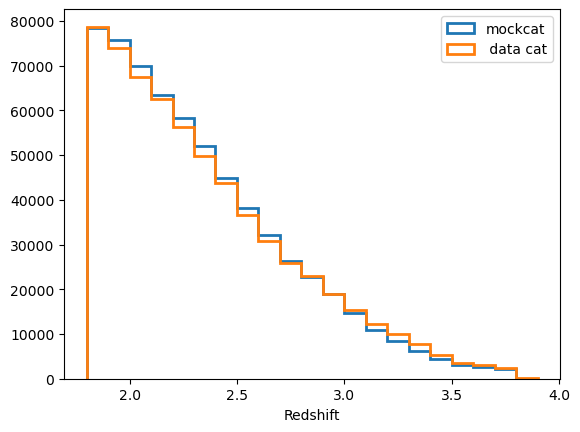

In [86]:
dndz=plt.hist(survey.mockcatalog['Z'],bins=np.arange(1.8,4,0.1),histtype='step',label='mockcat',lw=2)
plt.hist(survey.data['Z'],bins=np.arange(1.8,4,0.1),histtype='step',label=' data cat',lw=2)
plt.legend(loc='best')
plt.xlabel('Redshift')

## Magnitude distribution

Text(0.5, 0, 'r-band Magnitude')

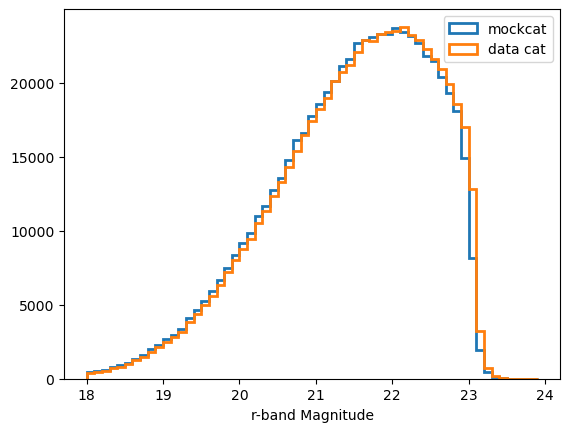

In [87]:
get_magnitude = lambda f: 22.5-2.5*np.log10(f)
plt.hist(get_magnitude(survey.mockcatalog['FLUX_R']),bins=np.arange(18,24,0.1),histtype='step',label='mockcat',lw=2)
plt.hist(get_magnitude(survey.data['FLUX_R']),bins=np.arange(18,24,0.1),histtype='step',label='data cat',lw=2)
plt.legend(loc='best')
plt.xlabel('r-band Magnitude')

## Npasses

Text(0, 0.5, 'DEC')

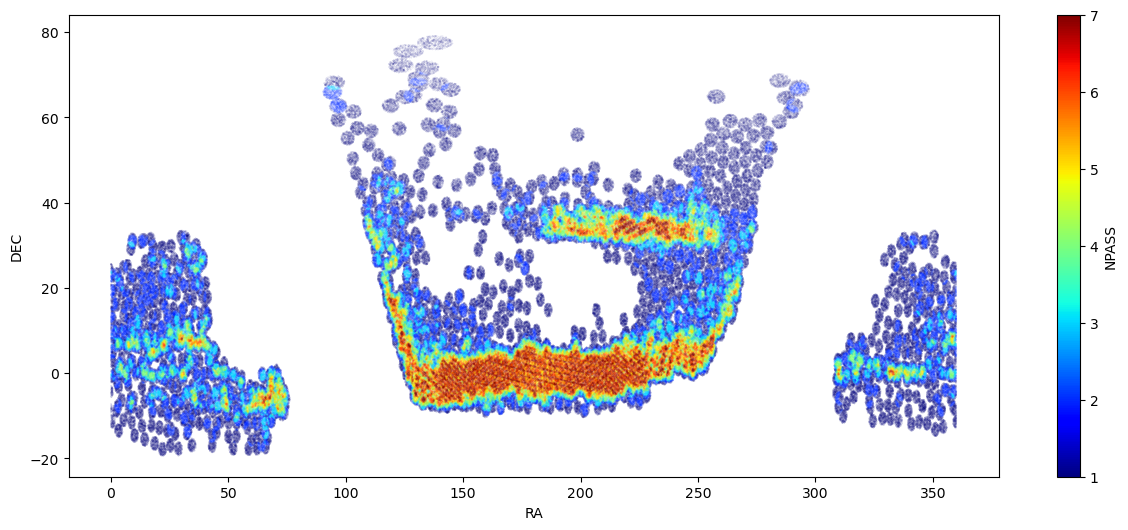

In [88]:
plt.figure(figsize=(15,6))
plt.scatter(mockcat.catalog['RA'],mockcat.catalog['DEC'],c=mockcat.catalog['NPASS'],s=0.001,cmap='jet')
plt.colorbar(label='NPASS')
plt.xlabel('RA')
plt.ylabel('DEC')

## Exposure time

Text(0, 0.5, 'DEC')

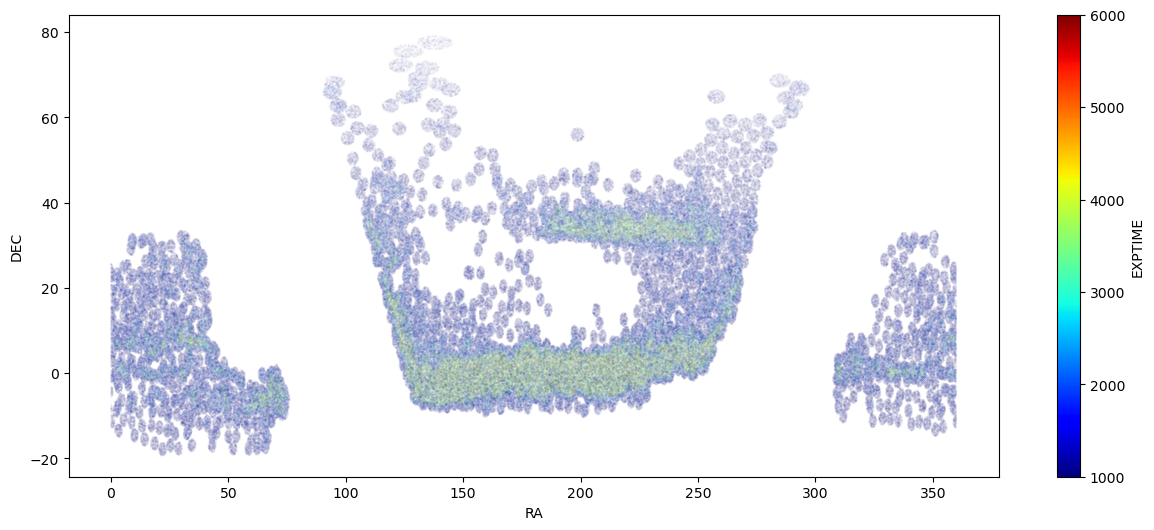

In [89]:
plt.figure(figsize=(15,6))
plt.scatter(mockcat.catalog['RA'],mockcat.catalog['DEC'],c=mockcat.catalog['EXPTIME'],s=0.0001,cmap='jet')
plt.colorbar(label='EXPTIME')
plt.xlabel('RA')
plt.ylabel('DEC')